# Loader + KDE

In [1]:
import sys
sys.path.append('../codes')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import pylab as plt

from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

### 1. Load justin beer data

Filtering parameters taken from https://www.dropbox.com/home/Meta_clustering/ms2lda/large_study/r/config?preview=config_beer_pos_3.yml for the beer data.
- rt_start: 3*60
- rt_end: 21*60
- min_MS1_intensity : 1E5 or 2E5 should do a decent job on Polyomics Q-Exactive data
- min_MS2_intensity: 5000

In [5]:
ds = DataSource(min_ms1_intensity=2E5, min_ms2_intensity=5000, min_rt=3*60, max_rt=21*60)

In [6]:
ms1_df = '../models/beer_ms1_peaks.csv.gz'
mzml_path = '/Users/joewandy/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/Data/FourBeers_mzML_files/POS'
ds.load_data(ms1_df, mzml_path)

/Users/joewandy/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/Data/FourBeers_mzML_files/POS/Beer_1_T10_POS.mzML (ms1=133179, ms2=73454)
/Users/joewandy/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/Data/FourBeers_mzML_files/POS/Beer_3_T10_POS.mzML (ms1=126874, ms2=68107)
/Users/joewandy/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/Data/FourBeers_mzML_files/POS/Beer_QC_T10_POS.mzML (ms1=129562, ms2=65496)
/Users/joewandy/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/Data/FourBeers_mzML_files/POS/Beer_2_T10_POS.mzML (ms1=132353, ms2=73049)


### 2. Train ms1 densities

In [7]:
densities = DensityEstimator()

In [8]:
ms_level = 1

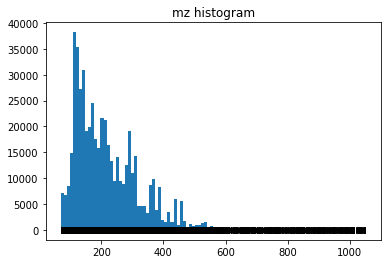

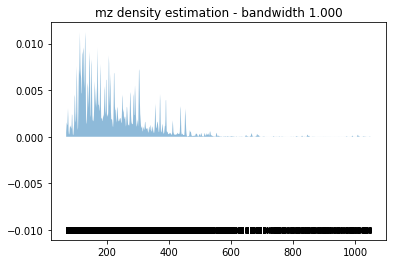

In [9]:
data_type = MZ
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1.0, plot=True)

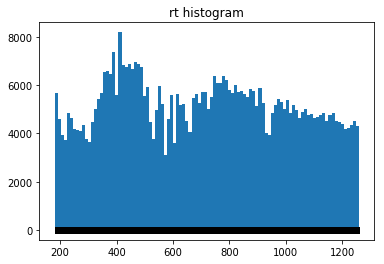

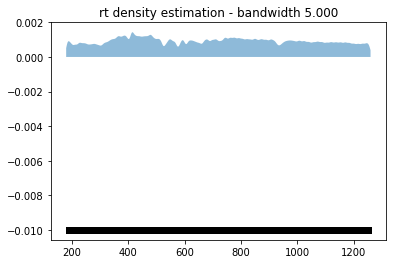

In [10]:
data_type = RT
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=5.0, plot=True)

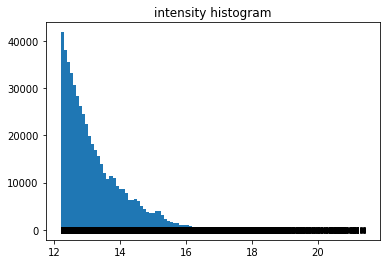

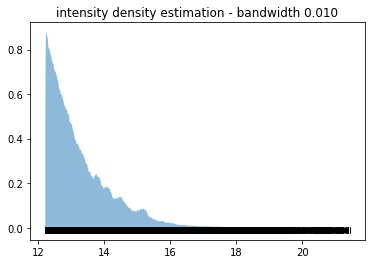

In [11]:
data_type = INTENSITY
ds.plot_histogram(data_type, ms_level, log=True)
densities.kde(ds, data_type, ms_level, log=True, bandwidth=0.01, plot=True)

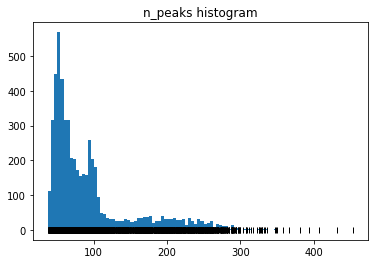

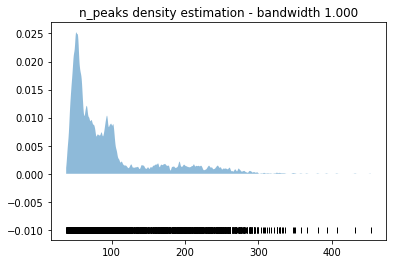

In [12]:
data_type = N_PEAKS
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1, plot=True)

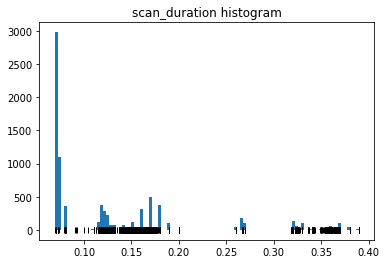

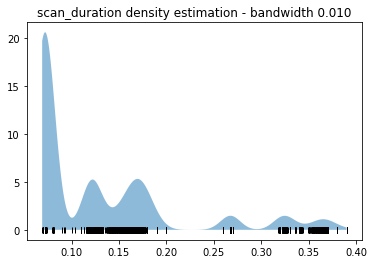

In [13]:
data_type = SCAN_DURATION
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=0.01, plot=True)

In [14]:
densities.sample(ms_level, 10)

array([[ 135.61752895,   12.81504104,  644.33046729],
       [ 212.6763656 ,   13.14366049,  439.23873904],
       [1009.37023981,   12.57148268,  971.50814365],
       [ 146.54580311,   14.50994822,  458.44761745],
       [ 210.41464096,   12.45625859,  387.0110744 ],
       [ 153.16260541,   12.26158365,  852.34716204],
       [ 200.27935755,   14.54747511,  974.61640541],
       [ 296.51507719,   13.3849269 ,  322.86180226],
       [ 106.05606255,   13.11651585,  811.78127489],
       [  76.45521961,   14.29455591,  250.57354178]])

### 3. Train ms2 densities

In [15]:
ms_level = 2

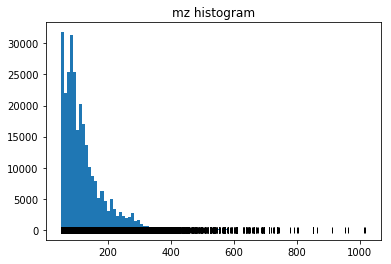

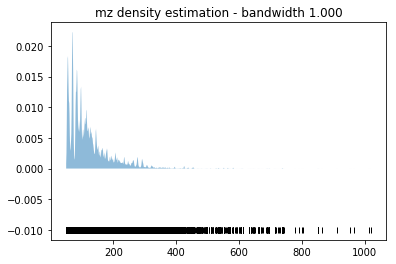

In [16]:
data_type = MZ
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1.0, plot=True)

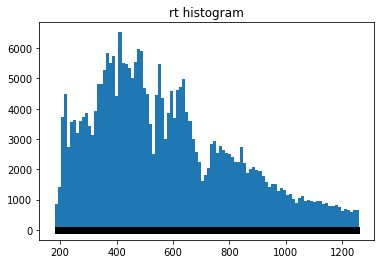

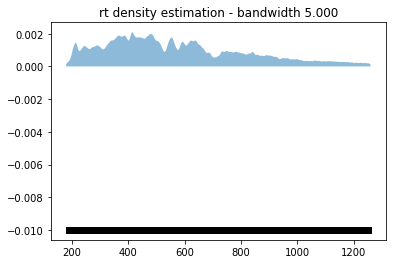

In [17]:
data_type = RT
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=5, plot=True)

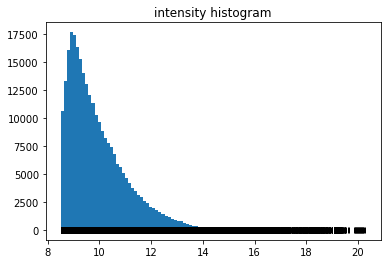

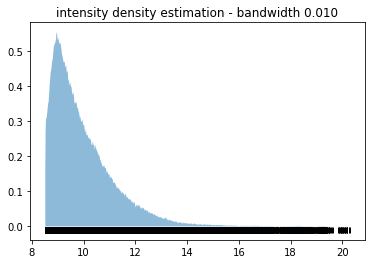

In [18]:
data_type = INTENSITY
ds.plot_histogram(data_type, ms_level, log=True)
densities.kde(ds, data_type, ms_level, log=True, bandwidth=0.01, plot=True)

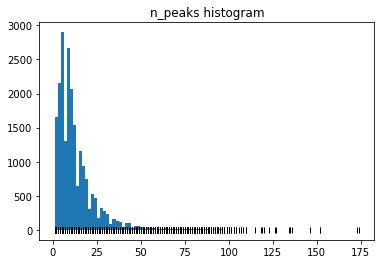

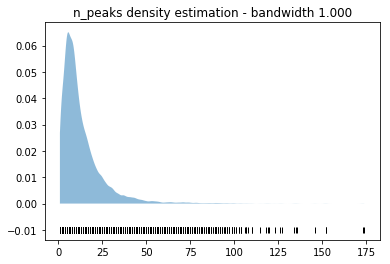

In [19]:
data_type = N_PEAKS
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1, plot=True)

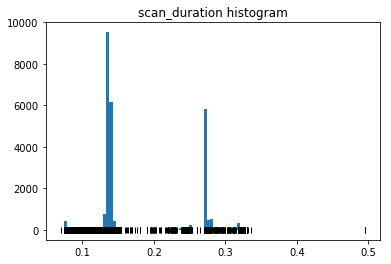

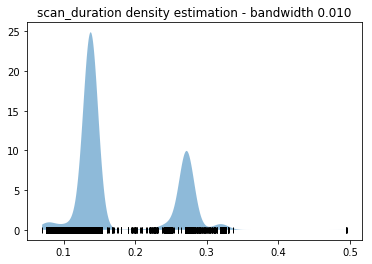

In [20]:
data_type = SCAN_DURATION
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=0.01, plot=True)

In [21]:
densities.sample(ms_level, 10)

array([[  62.71551502,    9.28784327,  637.36168845],
       [ 119.87678887,   12.79524219,  844.59584372],
       [  98.4515319 ,    8.82992868,  816.86057619],
       [  85.11596561,   10.82751563,  372.98930931],
       [ 175.51057329,    8.96928938, 1218.23386061],
       [ 121.8776266 ,    9.54847239,  782.12901692],
       [  85.61797859,    9.3881634 ,  636.25167492],
       [ 146.83685855,   10.20305052,  604.76545124],
       [  85.19788791,    9.88858126,  602.32754715],
       [ 146.35494607,    9.57386427,  312.01204924]])

### 4. Alternative KDE where we fit the m/z and intensity together

In [22]:
densities = PeakDensityEstimator()
densities.kde(ds, 1, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
densities.kde(ds, 2, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)

In [23]:
densities.sample(1, 10)

array([[ 208.80715933,   11.00494591, 1015.42474488],
       [ 360.06993345,   13.31118012, 1008.89976937],
       [ 206.39300817,   13.23314176,  274.95622943],
       [  79.03132205,   12.69813111,  429.95474299],
       [ 391.22783594,   12.5508643 ,  312.87113332],
       [ 206.26334923,   10.74598565,  841.70980883],
       [ 256.17443131,   13.1021779 , 1006.23893844],
       [ 306.56522128,   13.66902609,  939.51577573],
       [ 454.30386615,   13.67200805,  299.44463056],
       [ 358.69386693,   12.36516744,  511.46023042]])

In [24]:
densities.n_peaks(1, 10)

array([[106.68921425],
       [ 44.82504648],
       [ 75.69261429],
       [ 42.99100339],
       [ 51.30488639],
       [240.4663885 ],
       [ 80.50078368],
       [110.73268067],
       [ 57.91122742],
       [ 81.99421815]])

In [25]:
densities.scan_durations(1, 10)

array([[0.0815828 ],
       [0.18102383],
       [0.33439001],
       [0.18147621],
       [0.17394701],
       [0.06949798],
       [0.15426729],
       [0.06831069],
       [0.0694293 ],
       [0.16984609]])

In [26]:
densities.sample(2, 10)

array([[  69.15069165,    7.72099975,  260.7880229 ],
       [  99.03938364,    9.62909594,  397.73300943],
       [  85.56707977,   10.74245835, 1208.58748119],
       [ 239.9159489 ,    8.76181762, 1110.59389975],
       [  78.01625565,    8.94692098,  868.31844712],
       [ 145.77151969,    8.69207542, 1260.3713057 ],
       [  96.24198844,   10.46379717,  590.24520931],
       [  71.58154095,    8.1465227 ,  946.76987221],
       [  56.59572407,    9.22213402,  570.85772539],
       [ 144.34470763,   12.98347759,  745.41696951]])

In [27]:
densities.n_peaks(2, 10)

array([[10.57930425],
       [ 8.73199928],
       [ 7.84309852],
       [32.10563154],
       [11.34182617],
       [17.65656487],
       [15.47700855],
       [13.47963303],
       [10.00635254],
       [ 6.38958519]])

In [28]:
densities.scan_durations(2, 10)

array([[0.16178858],
       [0.11960801],
       [0.14458934],
       [0.14909283],
       [0.14409976],
       [0.27759589],
       [0.26748274],
       [0.26799158],
       [0.27156778],
       [0.26767122]])

### 5. Generate some synthetic peaks

In [29]:
ps = PeakSampler(densities)

In [30]:
save_obj(ps, '../models/peak_sampler_4_beers.p')

In [31]:
ps = load_obj('../models/peak_sampler_4_beers.p')

In [32]:
ps.sample(ms_level=1)

[PeakSample mz=388.3436 rt=401.56 intensity=1157973.90 ms_level=1,
 PeakSample mz=235.2943 rt=1131.07 intensity=2774532.20 ms_level=1,
 PeakSample mz=131.6002 rt=499.49 intensity=3094410.73 ms_level=1,
 PeakSample mz=171.4857 rt=603.62 intensity=2621908.40 ms_level=1,
 PeakSample mz=303.7314 rt=1257.23 intensity=248079.75 ms_level=1,
 PeakSample mz=144.4099 rt=386.68 intensity=329206.11 ms_level=1,
 PeakSample mz=359.4076 rt=560.53 intensity=122857.20 ms_level=1,
 PeakSample mz=276.7524 rt=426.07 intensity=289675.07 ms_level=1,
 PeakSample mz=257.5781 rt=456.52 intensity=106135.77 ms_level=1,
 PeakSample mz=94.5924 rt=718.18 intensity=82377.68 ms_level=1,
 PeakSample mz=265.6709 rt=1038.88 intensity=681347.54 ms_level=1,
 PeakSample mz=105.6275 rt=390.52 intensity=1056876.87 ms_level=1,
 PeakSample mz=84.4794 rt=478.28 intensity=2150249.84 ms_level=1,
 PeakSample mz=486.0209 rt=707.62 intensity=266286.47 ms_level=1,
 PeakSample mz=266.6959 rt=382.71 intensity=878534.45 ms_level=1,
 Pea

In [33]:
ps.sample(ms_level=1, n_peaks=10)

[PeakSample mz=208.4258 rt=1061.46 intensity=2849802.32 ms_level=1,
 PeakSample mz=467.0081 rt=456.13 intensity=598098.71 ms_level=1,
 PeakSample mz=181.1193 rt=998.43 intensity=1253714.72 ms_level=1,
 PeakSample mz=370.0241 rt=711.69 intensity=242109.20 ms_level=1,
 PeakSample mz=112.1215 rt=928.40 intensity=550398.82 ms_level=1,
 PeakSample mz=128.4001 rt=738.71 intensity=300465.82 ms_level=1,
 PeakSample mz=150.9996 rt=905.14 intensity=283153.18 ms_level=1,
 PeakSample mz=243.6739 rt=783.65 intensity=5281887.98 ms_level=1,
 PeakSample mz=219.1282 rt=1247.92 intensity=68135.40 ms_level=1,
 PeakSample mz=172.6043 rt=208.62 intensity=417144.39 ms_level=1]

In [34]:
ps.sample(ms_level=2)

[PeakSample mz=95.3015 rt=254.34 intensity=5257.03 ms_level=2,
 PeakSample mz=93.3178 rt=882.70 intensity=178098.64 ms_level=2,
 PeakSample mz=121.2404 rt=557.26 intensity=25758.34 ms_level=2,
 PeakSample mz=57.6536 rt=429.02 intensity=13616094.28 ms_level=2,
 PeakSample mz=108.6166 rt=491.86 intensity=10145.43 ms_level=2,
 PeakSample mz=116.4150 rt=694.19 intensity=205520.21 ms_level=2]

In [35]:
ps.sample(ms_level=2, n_peaks=10)

[PeakSample mz=103.2184 rt=1085.06 intensity=18000.25 ms_level=2,
 PeakSample mz=70.1224 rt=358.64 intensity=13730.01 ms_level=2,
 PeakSample mz=68.4184 rt=927.89 intensity=79646.38 ms_level=2,
 PeakSample mz=120.3483 rt=415.65 intensity=81763.00 ms_level=2,
 PeakSample mz=117.5501 rt=475.09 intensity=117860.13 ms_level=2,
 PeakSample mz=72.2498 rt=943.62 intensity=7678.72 ms_level=2,
 PeakSample mz=273.7834 rt=803.26 intensity=54657.71 ms_level=2,
 PeakSample mz=166.3702 rt=315.15 intensity=6542.16 ms_level=2,
 PeakSample mz=135.4749 rt=534.69 intensity=68494.35 ms_level=2,
 PeakSample mz=62.4583 rt=793.17 intensity=4283.77 ms_level=2]

### 6. Train on Justin's Urine Data

In [36]:
# ds = DataSource(min_ms1_intensity=2E5, min_ms2_intensity=5000, min_rt=3*60, max_rt=21*60, min_sn=100)
# ds.load_data('C:\\Users\\joewa\\Work\\docs\\clms\\Urines100Study_mzml_files_peaklist\\mzml_files')

In [37]:
# densities = PeakDensityEstimator()
# densities.kde(ds, 1, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
# densities.kde(ds, 2, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)

In [38]:
# ps = PeakSampler(densities)
# save_obj(ps, '../models/peak_sampler_100_urines.p')

In [39]:
# ps = load_obj('../models/peak_sampler_100_urines.p')

In [40]:
# ps.sample(ms_level=1)

In [41]:
# ps.sample(ms_level=2)